**Importing needed packages**

In [1]:
import os, torch, clip
from PIL import Image
import matplotlib.pyplot as plt

**Feeding the dataset to the CLIP model**

*Loads the model and preprocesses the dataset
 Makes 2 lists for images and names,
 then appends imgs with the images.
 After that, we encode the images so we can put a query and get pics.*

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device)

# Load images
folder = "images"
imgs, names = [], []
for f in os.listdir(folder):
    if f.endswith((".jpg",".png",".jpeg")):
        names.append(f)
        imgs.append(preprocess(Image.open(os.path.join(folder,f)).convert("RGB")).unsqueeze(0))

# Encode images
imgs = torch.cat(imgs).to(device)
img_feats = model.encode_image(imgs).detach()

**Get a query**

*Tokenize the query and then we check the cosine similarity of the query and the images, gets the top k (here k=2) results.*

Search:  Dogs


dogs.jpg


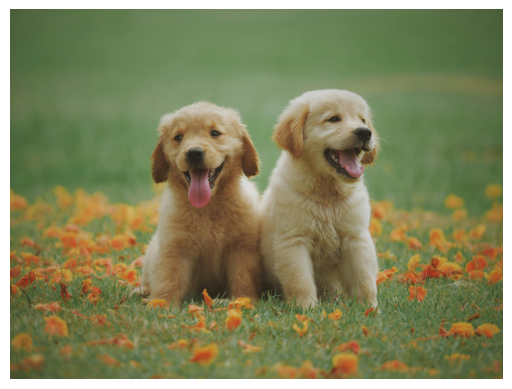

human_dog.jpg


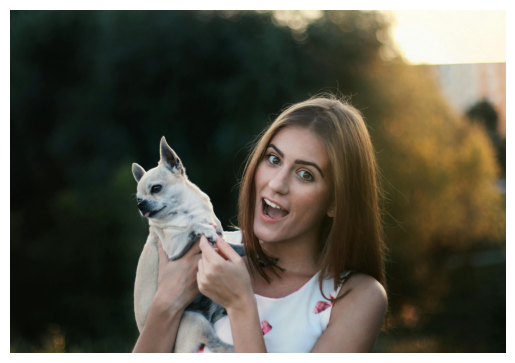

In [13]:
# Search
query = input("Search: ")
txt = clip.tokenize([query]).to(device)
txt_feat = model.encode_text(txt).detach()

# Cosine similarity
sims = (img_feats @ txt_feat.T).squeeze()
topk = sims.topk(2).indices

# Show results
for i in topk:
    path = os.path.join(folder, names[i])
    print(names[i])
    plt.imshow(Image.open(path))
    plt.axis("off")
    plt.show()

**Used matplotlib to show the images!!**